<a href="https://colab.research.google.com/github/dsmohiit/dsmohiit/blob/main/Working_with_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import re

In [20]:
df = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines="skip", engine="python")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
# Shape of data.
df.shape

(50000, 2)

In [22]:
# First review in data.
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [23]:
# Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [24]:
# Checking for Duplicates.
df.duplicated().sum()

418

In [25]:
# Removing Duplicates.
df.drop_duplicates(inplace= True)

# Data Cleaning

In [26]:
# Converting text into lower case.
df["review"] = df["review"].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [27]:
# Removing leading and trailing wide space.
df["review"] = df["review"].str.strip()

In [28]:
# Removinh HTML tags.
def remove_html(data):
  data = re.sub(r"<.*?>", "", data)

  return data

df["review"] = df["review"].apply(remove_html)

In [29]:
# Removing URLs.
def remove_url(data):
  data = re.sub(r'https?://\S+|www\.\S+', "", data)

  return data

df["review"] = df["review"].apply(remove_url)

In [30]:
# Expanding Abbreviations
def expand_contractions(text):

    # Dictionary of common contractions and their expansions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "i would",
        "i'll": "i will",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'd": "who would",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }

    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

        text = text.replace(contraction.capitalize(), expansion.capitalize())

    return text

df["review"] = df["review"].apply(expand_contractions)
df["review"] = df["review"].str.strip()
df["review"] = df["review"].str.lower()

In [ ]:
# Correcting the spellings.
from textblob import TextBlob

def sppeling_correction(text):
  return TextBlob(text).correct().string

df["review"] = df["review"].apply(sppeling_correction)

In [31]:
# Removing Punctuations(!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
import string

def remove_punctuations(text):
  for i in string.punctuation:
    if i in text:
      text = text.replace(i, "")

  return text

df["review"] = df["review"].apply(remove_punctuations)

# Data Pre-Processing


In [32]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df["tokenize_review"] = df["review"].apply(word_tokenize)
df.head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."


In [33]:
# Stop word removal.
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def stop_word_removal(text):
  l = []
  for word in text:
    if word not in stopwords.words("english"):
      l.append(word)

  return l

df["tokenize_review"] = df["tokenize_review"].apply(stop_word_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
df.head()

,review,sentiment,tokenize_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [35]:
# Updating the review column.
df["review"] = df["tokenize_review"].apply(lambda x: " ".join(x))
df.head()

,review,sentiment,tokenize_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


# Exploratory Data Analysis and Feature Engineering

In [36]:
# Adding a column - character length.
df["char_length"] = df["review"].str.len()
df.head(2)

,review,sentiment,tokenize_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1130
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656


In [37]:
# Adding a column - word length.
df["word_length"] = df["tokenize_review"].apply(len)
df.head(2)

,review,sentiment,tokenize_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1130,164
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84


<ipython-input-38-7587909c6275>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sentiment"] == "positive"]["char_length"])
<ipython-input-38-7587909c6275>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sentiment"] == "negative"]["char_length"])


<Axes: xlabel='char_length', ylabel='Density'>

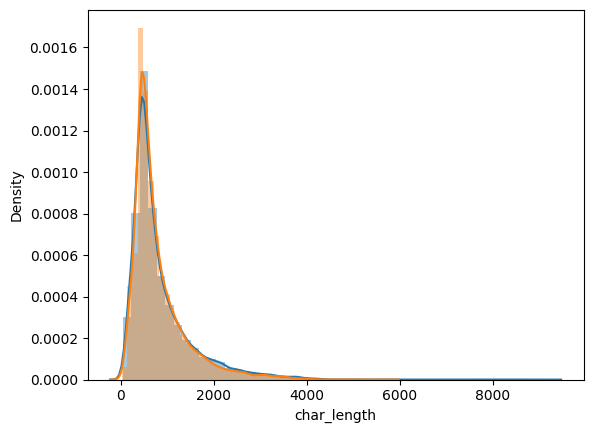

In [38]:
import seaborn as sns

sns.distplot(df[df["sentiment"] == "positive"]["char_length"])
sns.distplot(df[df["sentiment"] == "negative"]["char_length"])

<ipython-input-39-24a98d2b8056>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sentiment"] == "positive"]["word_length"])
<ipython-input-39-24a98d2b8056>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sentiment"] == "negative"]["word_length"])


<Axes: xlabel='word_length', ylabel='Density'>

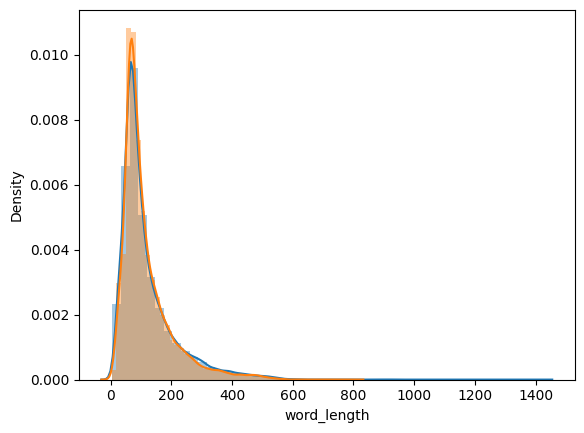

In [39]:
sns.distplot(df[df["sentiment"] == "positive"]["word_length"])
sns.distplot(df[df["sentiment"] == "negative"]["word_length"])

In [ ]:
# Creating Bigrams.
from nltk.util import ngrams

pd.Series(ngrams(df["tokenize_review"].sum(), 2)).value_counts()

In [ ]:
# Creating Trigrams.
pd.Series(ngrams(df["tokenize_review"].sum(), 3)).value_counts()

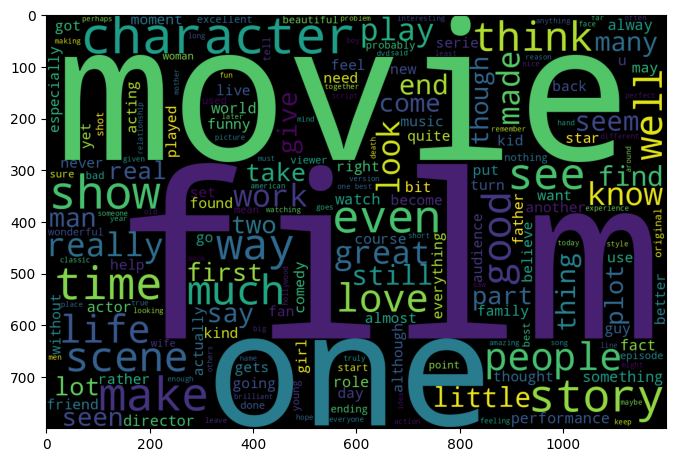

In [45]:
# Creating Word Cloud.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize= (8, 8))
wc = WordCloud(width= 1200, height= 800).generate(" ".join(df[df["sentiment"] == "positive"]["review"]))
plt.imshow(wc)

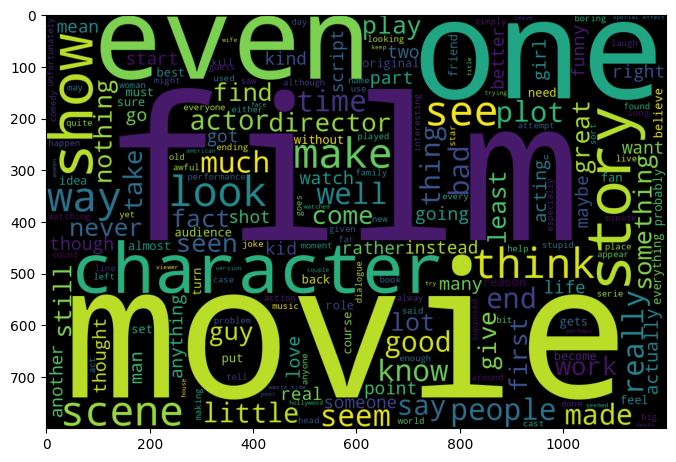

In [46]:
plt.figure(figsize= (8, 8))
wc = WordCloud(width= 1200, height= 800).generate(" ".join(df[df["sentiment"] == "negative"]["review"]))
plt.imshow(wc)

# Vectorization - BOW (Bag of Word)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features= 10000)
bag_of_word = count_vectorizer.fit_transform(df["review"])
bag_of_word = pd.DataFrame(bag_of_word.toarray(), columns= count_vectorizer.get_feature_names_out())

In [52]:
bag_of_word

,007,010,10,100,1000,10000,101,1010,11,110,...,zellweger,zero,zhang,zizek,zoey,zombi,zombie,zombies,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
